In [1]:
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

# Import
Reading the json using pandas. This makes one row with the price data and a column for each card id.

In [2]:
prices = pd.read_json("AllPrices.json")

In [3]:
prices.head()

,000031ff-f095-52c5-98a1-35bdb5e18a5b,0001fc69-3a61-51e3-aa17-19abb29803f2,00028782-6ec2-54fe-8633-2c906d8f1076,00040b50-3b84-5cea-b663-70038b87fa08,000473fc-c380-58ef-a52e-c745b880b0c2,0005e7e7-fe15-5acb-89aa-adacf0481952,00087aa5-4199-58ba-8e06-7acb796060cb,0008b776-44af-5d76-835b-692458848052,000cdbc5-3c5b-5bb6-b7db-49bf40a5d14f,000e2312-4558-53c6-af9a-cd4199304cf7,...,ffee5f0b-4ac6-5874-9788-3a660f445b8e,ffefa3e6-6433-5af3-91a3-d7fff6d85d11,fff6b135-5c9a-560d-8803-10d25c0c2041,fff70c21-34d3-5071-8d10-435197a8f6ae,fff7d4a5-a8f3-52ca-9380-1ca9e8c79b2f,fff8d67d-fe7e-5a9e-ba34-4d9b3b472674,fff8e480-729b-5668-83be-18a41dc819ce,fffad55b-adc1-5c6b-a8d1-ca258ffcae4f,fffcc00a-7b3f-5dbf-8a68-d4ff3fa94e44,fffcc2f5-28c7-5ba2-bb78-a4c4d3adc9f9
prices,"{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {'2019-1...","{'mtgo': {'2019-11-10': 0.01}, 'mtgoFoil': {'2...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {'2019-11-10': 0.01}, 'mtgoFoil': {'2...","{'mtgo': {'2019-11-10': 0.01}, 'mtgoFoil': {'2...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {'2019-0...","{'mtgo': {'2019-11-10': 0.04}, 'mtgoFoil': {'2...","{'mtgo': {'2019-11-10': 0.04}, 'mtgoFoil': {'2...",...,"{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {'2019-11-10': 0.03}, 'mtgoFoil': {'2...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {'2019-11-10': 0.6900000000000001}, '...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {}, 'pap...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {'2019-1...","{'mtgo': {'2019-11-10': 0.03}, 'mtgoFoil': {'2...","{'mtgo': {}, 'mtgoFoil': {}, 'paper': {'2019-1..."


To normalize the data it first must be transformed to a long format.

In [4]:
prices = prices.transpose()

The index is reset so that the the unique identifiers becomes a variable which is renamed 'uuid'

In [5]:
prices = prices.reset_index()

The json_normalize method is used to expand the first level of the dictionary structures that wre created when the JSON file was imported

# Date Range For Price Data
This code generates a list of all the dates for which there is price data

In [6]:
dfy = pd.concat([prices['index'],json_normalize(prices['prices'],max_level=1)], axis = 1)

In [7]:
cols = list(dfy.columns)

In [8]:
years = set()
for col in cols:
    if col == 'index':
        continue
    else:
        year = col.split('.')[1]
        years.add(year)

The date range for the price data is only 3 months

In [9]:
min(years)

'2019-08-10'

In [10]:
max(years)

'2019-11-10'

In [11]:
prices = pd.concat([prices['index'],json_normalize(prices['prices'],max_level=0)], axis = 1)

The unique identifier is renamed 'uuid' and set as the index.

In [12]:
prices = prices.rename(columns = {'index':'uuid'})

In [13]:
prices = prices.set_index('uuid')

# Averageing Price Data
We decided to average this price data since we would not be looking at any temporal changes. The following function was created to do this.

In [14]:
def avgDict(x):
    if type(x) == dict:
        vals = list(x.values())
        c = 0
        s = 0
        for val in vals:
            if val != None:
                s += val
                c += 1
        if c > 0:
            avg = s/c
        else:
            avg = 0
    else:
        avg = 0
    return avg

prices = prices.applymap(avgDict)

In [15]:
prices = prices.reset_index()

# Final Price Data
The final data is now in a form that can be joined with with the csv of the card data. We output the data to a cvs to be imported into and manipulated with R.

In [16]:
prices.head()

,uuid,mtgo,mtgoFoil,paper,paperFoil
0,000031ff-f095-52c5-98a1-35bdb5e18a5b,0.00,0.00,0.00,0.00
1,0001fc69-3a61-51e3-aa17-19abb29803f2,0.00,0.00,0.00,0.00
2,00028782-6ec2-54fe-8633-2c906d8f1076,0.00,0.00,0.15,0.00
3,00040b50-3b84-5cea-b663-70038b87fa08,0.01,0.02,0.16,0.45
4,000473fc-c380-58ef-a52e-c745b880b0c2,0.00,0.00,0.00,0.00


In [17]:
prices.to_csv('mean_2019_prices.csv')

# Price Data Summary

In [18]:
prices.describe()

,mtgo,mtgoFoil,paper,paperFoil
count,47877.000000,47877.000000,47877.000000,47877.000000
mean,0.249169,0.315934,6.993864,3.626086
std,2.589153,1.852014,129.765753,27.271963
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.030000,0.000000
50%,0.010000,0.010000,0.140000,0.120000
75%,0.030000,0.030000,0.452105,0.900000
max,345.020000,100.640000,14999.000000,4159.831579


# Alternative Card Data
In order to get release data information we created an alternative data set from the AllPrintings.json file found at mtgjson.com.

In [19]:
df = pd.read_json('AllPrintings.json')

In [20]:
df = df.transpose()

The all printings json is organised by set and has a cards column that contains all of the data for the cards of the set.  We will unpack that to make our alternative cards data set.

In [21]:
df.head()

,baseSetSize,block,boosterV3,cards,code,isFoilOnly,isOnlineOnly,keyruneCode,mcmId,mcmName,...,name,releaseDate,tcgplayerGroupId,tokens,totalSetSize,type,isForeignOnly,parentCode,codeV3,isPartialPreview
10E,383,Core Set,"[rare, uncommon, uncommon, uncommon, common, c...","[{'artist': 'Rebecca Guay', 'borderColor': 'bl...",10E,False,False,10E,74,Tenth Edition,...,Tenth Edition,2007-07-13,1,"[{'artist': 'Jim Pavelec', 'borderColor': 'bla...",508,core,NaN,NaN,NaN,NaN
2ED,302,Core Set,"[rare, uncommon, uncommon, uncommon, common, c...","[{'artist': 'Richard Thomas', 'borderColor': '...",2ED,False,False,2ED,3,Unlimited,...,Unlimited Edition,1993-12-01,115,[],302,core,NaN,NaN,NaN,NaN
3ED,306,Core Set,"[rare, uncommon, uncommon, uncommon, common, c...","[{'artist': 'Richard Thomas', 'borderColor': '...",3ED,False,False,3ED,6,Revised,...,Revised Edition,1994-04-01,97,[],306,core,NaN,NaN,NaN,NaN
4BB,0,NaN,NaN,"[{'artist': 'Mark Tedin', 'borderColor': 'blac...",4BB,False,False,4ED,NaN,NaN,...,Fourth Edition Foreign Black Border,1995-04-01,NaN,[],378,core,True,NaN,NaN,NaN
4ED,378,Core Set,"[rare, uncommon, uncommon, uncommon, common, c...","[{'artist': 'Mark Tedin', 'borderColor': 'whit...",4ED,False,False,4ED,10,Fourth Edition,...,Fourth Edition,1995-04-01,46,[],379,core,NaN,NaN,NaN,NaN


In [25]:
# Unpacks the card data and adds edition, edition name, and release date
n = 0
for index in list(df.index):
    n+=1
    temp = pd.DataFrame(df.loc[index,'cards'])
    temp['edition'] = index
    temp['editionName'] = df.loc[index,'name']
    temp['releaseDate'] = df.loc[index,'releaseDate']
    if n == 1:
        AllCards = pd.DataFrame(temp)
    else:
        AllCards = AllCards.append(temp, ignore_index=True)

## Heatmap of Missing Values

In [26]:
#merges the price and card data
df = pd.merge(AllCards,prices,on='uuid',how='outer')

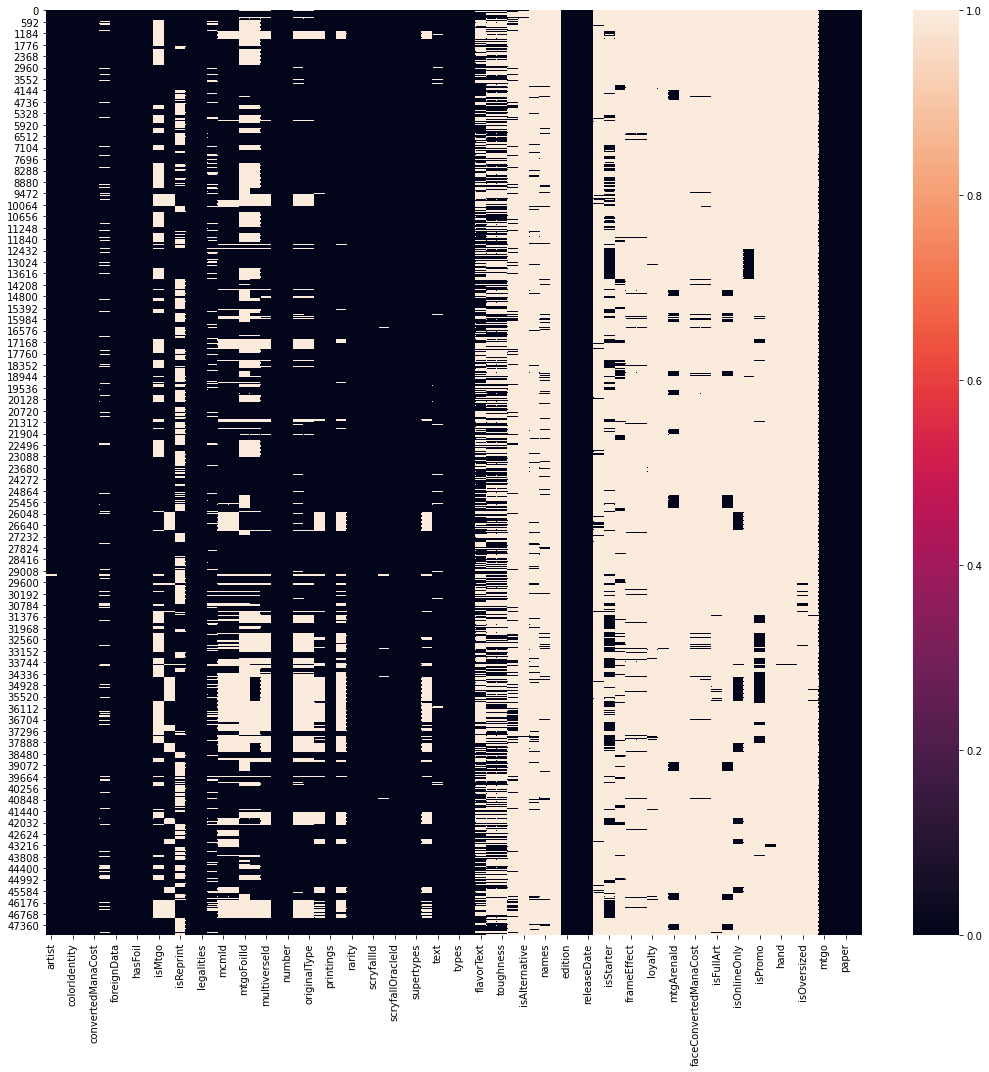

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isna())
plt.tight_layout()

We decied to drop any column that was more the 75% null values.

In [29]:
#drops columns that are more then 75% null
for c in list(df.columns):
    col = df.loc[:,c]
    na = len(col.dropna())
    l = len(col)
    if na/l < 0.25:
        df = df.drop(c,axis = 1)

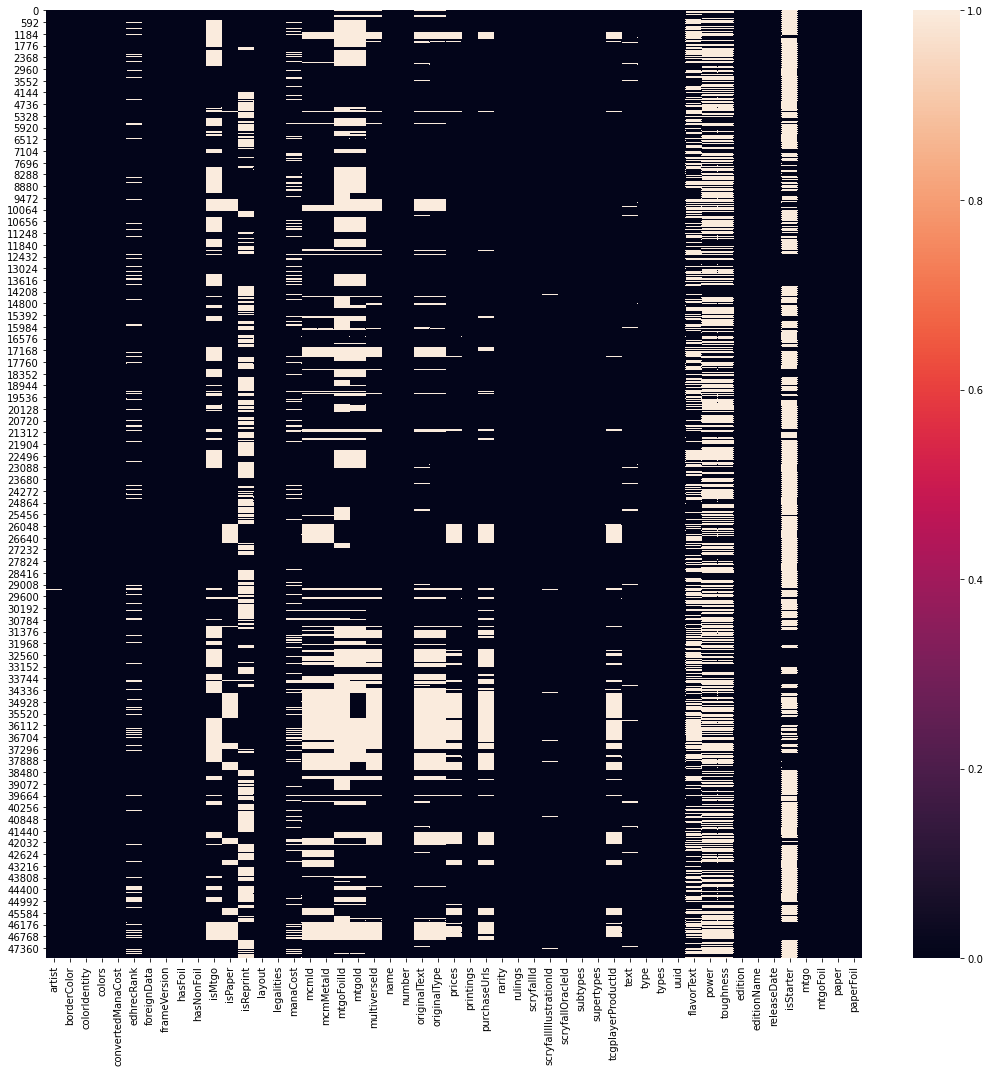

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isna())
plt.tight_layout()

In [31]:
df.columns

Index(['artist', 'borderColor', 'colorIdentity', 'colors', 'convertedManaCost',
       'edhrecRank', 'foreignData', 'frameVersion', 'hasFoil', 'hasNonFoil',
       'isMtgo', 'isPaper', 'isReprint', 'layout', 'legalities', 'manaCost',
       'mcmId', 'mcmMetaId', 'mtgoFoilId', 'mtgoId', 'multiverseId', 'name',
       'number', 'originalText', 'originalType', 'prices', 'printings',
       'purchaseUrls', 'rarity', 'rulings', 'scryfallId',
       'scryfallIllustrationId', 'scryfallOracleId', 'subtypes', 'supertypes',
       'tcgplayerProductId', 'text', 'type', 'types', 'uuid', 'flavorText',
       'power', 'toughness', 'edition', 'editionName', 'releaseDate',
       'isStarter', 'mtgo', 'mtgoFoil', 'paper', 'paperFoil'],
      dtype='object')

These are the columns that we decided to drop for this data set.

In [32]:
todrop = ['originalText', 'originalType','prices','printings',
         'purchaseUrls','rulings','scryfallId','scryfallIllustrationId',
         'scryfallOracleId','tcgplayerProductId', 'text', 'type', 'types',
         'number', 'multiverseId', 'mtgoFoilId', 'mtgoId','mcmMetaId',
          'mcmId','legalities','foreignData'] 

In [33]:
df = df.drop(todrop,axis = 1)

In [34]:
df.columns

Index(['artist', 'borderColor', 'colorIdentity', 'colors', 'convertedManaCost',
       'edhrecRank', 'frameVersion', 'hasFoil', 'hasNonFoil', 'isMtgo',
       'isPaper', 'isReprint', 'layout', 'manaCost', 'name', 'rarity',
       'subtypes', 'supertypes', 'uuid', 'flavorText', 'power', 'toughness',
       'edition', 'editionName', 'releaseDate', 'isStarter', 'mtgo',
       'mtgoFoil', 'paper', 'paperFoil'],
      dtype='object')

In [35]:
df.to_csv('AllCardsAlt.csv')